In [1287]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor,VotingRegressor,StackingRegressor

In [1015]:
df = pd.read_csv(r"E:\laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [1016]:
df.shape

(1303, 12)

In [1017]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [1018]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [1019]:
df.describe(include = "O")

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,6,40,118,9,39,110,9,179
top,Dell,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,727,507,190,619,412,281,1072,121


In [1020]:
df.dtypes

Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [1021]:
df[df["Price"] < 0]

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price


In [1022]:
df.drop(columns = ["Unnamed: 0"],inplace = True)

In [1023]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1143,HP,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,256GB SSD,Nvidia Quadro M1000M,Windows 7,2.59kg,118761.120
340,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Linux,2.2kg,14646.672
302,Lenovo,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,6GB,1TB HDD,Nvidia GeForce GTX 940M,Windows 10,2.8kg,34578.720
50,Lenovo,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics 400,Android,0.69kg,16996.320
113,HP,Notebook,14.0,IPS Panel 1366x768,Intel Core i5 8250U 1.6GHz,4GB,500GB HDD,Intel UHD Graphics 620,Windows 10,1.63kg,38468.160


In [1024]:
df["Ram"].value_counts()

Ram
8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: count, dtype: int64

In [1025]:
def ramfunc(x):
    return x.split("G")[0]

In [1026]:
df["Ram"] = df["Ram"].apply(ramfunc)

In [1027]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
573,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.3kg,44222.40
960,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.2kg,81784.80
615,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3kg,62231.04
307,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Nvidia GeForce 930M,Windows 10,2.2kg,55571.04
1183,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 2GHz,4,500GB HDD,Intel HD Graphics 500,Windows 10,2.1kg,17742.24


In [1028]:
df["Ram"] = df["Ram"].astype(int)

In [1029]:
df["Weight"].value_counts().index.tolist()

['2.2kg',
 '2.1kg',
 '2.4kg',
 '2.3kg',
 '2.5kg',
 '2kg',
 '2.8kg',
 '1.2kg',
 '1.86kg',
 '2.04kg',
 '1.4kg',
 '2.18kg',
 '1.9kg',
 '1.5kg',
 '1.6kg',
 '1.95kg',
 '1.7kg',
 '1.3kg',
 '1.8kg',
 '1.1kg',
 '1.26kg',
 '3kg',
 '1.36kg',
 '1.91kg',
 '1.37kg',
 '2.62kg',
 '2.7kg',
 '2.6kg',
 '1.25kg',
 '1.29kg',
 '4.42kg',
 '1.63kg',
 '1.49kg',
 '2.06kg',
 '2.0kg',
 '2.23kg',
 '1.48kg',
 '1.84kg',
 '2.9kg',
 '2.65kg',
 '1.64kg',
 '1.44kg',
 '2.36kg',
 '2.31kg',
 '1.54kg',
 '3.2kg',
 '2.02kg',
 '1.05kg',
 '1.23kg',
 '1.65kg',
 '1.32kg',
 '1.45kg',
 '1.42kg',
 '1.43kg',
 '1.62kg',
 '1.34kg',
 '1.75kg',
 '1.88kg',
 '2.25kg',
 '1.28kg',
 '2.19kg',
 '1.93kg',
 '2.32kg',
 '1.16kg',
 '2.24kg',
 '2.05kg',
 '1.96kg',
 '1.35kg',
 '1.21kg',
 '2.20kg',
 '1.17kg',
 '1.47kg',
 '3.78kg',
 '1.13kg',
 '4.36kg',
 '2.43kg',
 '0.69kg',
 '1.38kg',
 '1.83kg',
 '1.22kg',
 '1.252kg',
 '1.85kg',
 '2.59kg',
 '4.6kg',
 '1.24kg',
 '0.920kg',
 '4.3kg',
 '2.09kg',
 '2.63kg',
 '2.37kg',
 '2.56kg',
 '3.35kg',
 '1.68kg',
 '2

In [1030]:
def Weightfunc(x):
    return x.split("k")[0]

In [1031]:
df["Weight"] = df["Weight"].apply(Weightfunc)

In [1032]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [1033]:
df["Weight"] = df["Weight"].astype(float)

In [1034]:
df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [1035]:
import re

def convert_to_gb(value):
    value = value.strip()
    if "TB" in value:
        return float(re.sub(r'[^\d.]', '', value)) * 1000
    elif "GB" in value:
        return float(re.sub(r'[^\d.]', '', value))
    else:
        return 0


ssd = []
hdd = []
flash = []
hybrid = []


for entry in df['Memory']:
    entry = entry.upper().split('+')
    ssd_size = 0
    hdd_size = 0
    flash_size = 0
    hybrid_size = 0

    for part in entry:
        part = part.strip()
        if 'SSD' in part and 'FLASH' not in part:
            ssd_size += convert_to_gb(part)
        elif 'HDD' in part:
            hdd_size += convert_to_gb(part)
        elif 'FLASH' in part:
            flash_size += convert_to_gb(part)
        elif 'HYBRID' in part:
            hybrid_size += convert_to_gb(part)

    ssd.append(ssd_size)
    hdd.append(hdd_size)
    flash.append(flash_size)
    hybrid.append(hybrid_size)


df['SSD'] = ssd
df['HDD'] = hdd
df['Flash_Storage'] = flash
df['Hybrid'] = hybrid


In [1036]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,SSD,HDD,Flash_Storage,Hybrid
586,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.78,79813.44,256.0,1000.0,0.0,0.0
304,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,67399.20,128.0,1000.0,0.0,0.0
893,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.32,95850.72,256.0,0.0,0.0,0.0
847,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,512GB SSD,Nvidia GeForce 940M,Windows 10,1.45,54665.28,512.0,0.0,0.0,0.0
518,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.04,47365.92,256.0,0.0,0.0,0.0


In [1037]:
df.loc[352]

Company                                     MSI
TypeName                                 Gaming
Inches                                     17.3
ScreenResolution              Full HD 1920x1080
Cpu                 Intel Core i7 7700HQ 2.8GHz
Ram                                           8
Memory                     128GB SSD +  1TB HDD
Gpu                     Nvidia GeForce GTX 1060
OpSys                                Windows 10
Weight                                      2.7
Price                                  75071.52
SSD                                       128.0
HDD                                      1000.0
Flash_Storage                               0.0
Hybrid                                      0.0
Name: 352, dtype: object

In [1038]:
df.drop(columns = ["Memory"],inplace = True)

In [1039]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD,Flash_Storage,Hybrid
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128.0,0.0,0.0,0.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0.0,0.0,128.0,0.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,256.0,0.0,0.0,0.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,512.0,0.0,0.0,0.0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,256.0,0.0,0.0,0.0


In [1040]:
df["Company"].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

In [1041]:
top_brands = df['Company'].value_counts()[df['Company'].value_counts() >= 20].index
df['Company'] = df['Company'].apply(lambda x: x if x in top_brands else 'Other')

In [1042]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD,Flash_Storage,Hybrid
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128.0,0.0,0.0,0.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0.0,0.0,128.0,0.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,256.0,0.0,0.0,0.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,512.0,0.0,0.0,0.0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,256.0,0.0,0.0,0.0


In [1043]:
df["TypeName"].value_counts().index.tolist()

['Notebook',
 'Gaming',
 'Ultrabook',
 '2 in 1 Convertible',
 'Workstation',
 'Netbook']

In [1044]:
preprocessor = ColumnTransformer(
    transformers=[
        ('company_ohe', OneHotEncoder(handle_unknown='ignore'), ['Company']),
        ('type_ohe', OneHotEncoder(handle_unknown='ignore'), ['TypeName'])
    ],
    remainder='passthrough'  # Keep other columns
)

# Step 3: Fit and transform
processed_data = preprocessor.fit_transform(df)

In [1045]:
ohe_company = preprocessor.named_transformers_['company_ohe']
ohe_type = preprocessor.named_transformers_['type_ohe']
columns = list(ohe_company.get_feature_names_out(['Company'])) + \
          list(ohe_type.get_feature_names_out(['TypeName'])) + \
          list(df.drop(columns=['Company', 'TypeName']).columns)

processed_df = pd.DataFrame(processed_data, columns=columns)
df = processed_df

In [1046]:
df.head()

,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,Company_Lenovo,Company_MSI,Company_Other,Company_Toshiba,TypeName_2 in 1 Convertible,...,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD,Flash_Storage,Hybrid
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0.0,0.0,128.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0,256.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.336,512.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.808,256.0,0.0,0.0,0.0


In [1047]:
df.columns

Index(['Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Dell',
       'Company_HP', 'Company_Lenovo', 'Company_MSI', 'Company_Other',
       'Company_Toshiba', 'TypeName_2 in 1 Convertible', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Gpu', 'OpSys', 'Weight', 'Price', 'SSD', 'HDD', 'Flash_Storage',
       'Hybrid'],
      dtype='object')

In [1048]:
df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [1049]:
df['ScreenResolution'] = df['ScreenResolution'].str.lower()


df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'touchscreen' in x else 0)
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'ips' in x else 0)
df['Retina'] = df['ScreenResolution'].apply(lambda x: 1 if 'retina' in x else 0)
df['4K'] = df['ScreenResolution'].apply(lambda x: 1 if '3840x2160' in x else 0)


df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d{3,4}x\d{3,4})')[0]


df[['Resolution_X', 'Resolution_Y']] = df['Resolution'].str.split('x', expand=True).astype(float)

df['PPI'] = ((df['Resolution_X']**2 + df['Resolution_Y']**2)**0.5) / df['Inches']


In [1050]:
df.drop('ScreenResolution', axis=1, inplace=True)
df.head()

,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,Company_Lenovo,Company_MSI,Company_Other,Company_Toshiba,TypeName_2 in 1 Convertible,...,Flash_Storage,Hybrid,Touchscreen,IPS,Retina,4K,Resolution,Resolution_X,Resolution_Y,PPI
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,1,1,0,2560x1600,2560.0,1600.0,226.983005
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,128.0,0.0,0,0,0,0,1440x900,1440.0,900.0,127.67794
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,1920x1080,1920.0,1080.0,141.211998
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,1,1,0,2880x1800,2880.0,1800.0,220.534624
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,1,1,0,2560x1600,2560.0,1600.0,226.983005


In [1051]:
df[["Cpu","Gpu","OpSys"]]

,Cpu,Gpu,OpSys
0,Intel Core i5 2.3GHz,Intel Iris Plus Graphics 640,macOS
1,Intel Core i5 1.8GHz,Intel HD Graphics 6000,macOS
2,Intel Core i5 7200U 2.5GHz,Intel HD Graphics 620,No OS
3,Intel Core i7 2.7GHz,AMD Radeon Pro 455,macOS
4,Intel Core i5 3.1GHz,Intel Iris Plus Graphics 650,macOS
...,...,...,...
1298,Intel Core i7 6500U 2.5GHz,Intel HD Graphics 520,Windows 10
1299,Intel Core i7 6500U 2.5GHz,Intel HD Graphics 520,Windows 10
1300,Intel Celeron Dual Core N3050 1.6GHz,Intel HD Graphics,Windows 10
1301,Intel Core i7 6500U 2.5GHz,AMD Radeon R5 M330,Windows 10


In [1052]:
df["OpSys"].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [1053]:
def simplify_os(os_name):
    os_name = os_name.lower()
    if 'windows' in os_name:
        return 'Windows'
    elif 'mac' in os_name:
        return 'Mac'
    elif 'linux' in os_name:
        return 'Linux'
    elif 'chrome' in os_name:
        return 'Chrome OS'
    elif 'no os' in os_name:
        return 'No OS'
    elif 'android' in os_name:
        return 'Other'
    else:
        return 'Other'

df['OpSys'] = df['OpSys'].apply(simplify_os)

In [1054]:
df1 = pd.get_dummies(df['OpSys'], prefix='OS')
df1 = df1.astype("float")
df1.head()

,OS_Chrome OS,OS_Linux,OS_Mac,OS_No OS,OS_Other,OS_Windows
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [1055]:
df = pd.concat([df,df1],axis =1)
df.head()

,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,Company_Lenovo,Company_MSI,Company_Other,Company_Toshiba,TypeName_2 in 1 Convertible,...,Resolution,Resolution_X,Resolution_Y,PPI,OS_Chrome OS,OS_Linux,OS_Mac,OS_No OS,OS_Other,OS_Windows
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2560x1600,2560.0,1600.0,226.983005,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1440x900,1440.0,900.0,127.67794,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1920x1080,1920.0,1080.0,141.211998,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2880x1800,2880.0,1800.0,220.534624,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2560x1600,2560.0,1600.0,226.983005,0.0,0.0,1.0,0.0,0.0,0.0


In [1056]:
df.drop("OpSys",axis = 1,inplace = True)

In [1057]:
df.columns

Index(['Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Dell',
       'Company_HP', 'Company_Lenovo', 'Company_MSI', 'Company_Other',
       'Company_Toshiba', 'TypeName_2 in 1 Convertible', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'Inches', 'Cpu', 'Ram', 'Gpu', 'Weight',
       'Price', 'SSD', 'HDD', 'Flash_Storage', 'Hybrid', 'Touchscreen', 'IPS',
       'Retina', '4K', 'Resolution', 'Resolution_X', 'Resolution_Y', 'PPI',
       'OS_Chrome OS', 'OS_Linux', 'OS_Mac', 'OS_No OS', 'OS_Other',
       'OS_Windows'],
      dtype='object')

In [1058]:
df.drop('Resolution', axis=1, inplace=True)

In [1059]:
df["Gpu"] = df["Gpu"].apply(lambda x: x.split(" ")[0])

In [1060]:
df["Gpu"].value_counts()

Gpu
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [1061]:
df.shape

(1303, 38)

In [1062]:
df = df[df['Gpu'] != 'ARM']

In [1063]:
df.shape

(1302, 38)

In [1064]:
for i,v in zip(df["Cpu"].value_counts().index,df["Cpu"].value_counts()):
    print(i,"--->",v)

Intel Core i5 7200U 2.5GHz ---> 190
Intel Core i7 7700HQ 2.8GHz ---> 146
Intel Core i7 7500U 2.7GHz ---> 134
Intel Core i7 8550U 1.8GHz ---> 73
Intel Core i5 8250U 1.6GHz ---> 72
Intel Core i5 6200U 2.3GHz ---> 68
Intel Core i3 6006U 2GHz ---> 64
Intel Core i7 6500U 2.5GHz ---> 49
Intel Core i7 6700HQ 2.6GHz ---> 43
Intel Core i3 7100U 2.4GHz ---> 37
Intel Core i5 7300HQ 2.5GHz ---> 33
Intel Celeron Dual Core N3350 1.1GHz ---> 30
Intel Celeron Dual Core N3060 1.6GHz ---> 28
Intel Core i7 6600U 2.6GHz ---> 18
Intel Core i3 6006U 2.0GHz ---> 16
Intel Core i5 7300U 2.6GHz ---> 14
Intel Pentium Quad Core N4200 1.1GHz ---> 14
Intel Core i7 7600U 2.8GHz ---> 13
Intel Pentium Quad Core N3710 1.6GHz ---> 11
AMD A9-Series 9420 3GHz ---> 11
Intel Core i5 6300U 2.4GHz ---> 11
Intel Celeron Dual Core N3050 1.6GHz ---> 11
Intel Core i7 6820HK 2.7GHz ---> 10
Intel Core i3 6100U 2.3GHz ---> 9
Intel Core i3 7130U 2.7GHz ---> 8
Intel Core i7 7820HK 2.9GHz ---> 7
AMD A6-Series 9220 2.5GHz ---> 7
Intel C

In [1065]:
df.columns

Index(['Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Dell',
       'Company_HP', 'Company_Lenovo', 'Company_MSI', 'Company_Other',
       'Company_Toshiba', 'TypeName_2 in 1 Convertible', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'Inches', 'Cpu', 'Ram', 'Gpu', 'Weight',
       'Price', 'SSD', 'HDD', 'Flash_Storage', 'Hybrid', 'Touchscreen', 'IPS',
       'Retina', '4K', 'Resolution_X', 'Resolution_Y', 'PPI', 'OS_Chrome OS',
       'OS_Linux', 'OS_Mac', 'OS_No OS', 'OS_Other', 'OS_Windows'],
      dtype='object')

In [1066]:
def simplify_cpu(cpu):
    cpu = cpu.lower()
    if 'intel core i3' in cpu:
        return 'Intel Core i3'
    elif 'intel core i5' in cpu:
        return 'Intel Core i5'
    elif 'intel core i7' in cpu:
        return 'Intel Core i7'
    elif 'amd' in cpu:
        return 'AMD Processor'
    else:
        return 'Other Processor'

In [1067]:
df['Cpu_Type'] = df['Cpu'].apply(simplify_cpu)

In [1068]:
def extract_ghz(cpu):
    match = re.search(r"([\d.]+)\s*GHz", cpu)
    return float(match.group(1)) if match else None

df['Cpu_Speed_GHz'] = df['Cpu'].apply(extract_ghz)


In [1069]:
df[["Cpu_Speed_GHz","Cpu_Type"]].head()

,Cpu_Speed_GHz,Cpu_Type
0,2.3,Intel Core i5
1,1.8,Intel Core i5
2,2.5,Intel Core i5
3,2.7,Intel Core i7
4,3.1,Intel Core i5


In [1070]:
df1 = pd.get_dummies(df['Cpu_Type'])
df1 = df1.astype("float")
df = pd.concat([df,df1],axis =1)
df.head()

,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,Company_Lenovo,Company_MSI,Company_Other,Company_Toshiba,TypeName_2 in 1 Convertible,...,OS_No OS,OS_Other,OS_Windows,Cpu_Type,Cpu_Speed_GHz,AMD Processor,Intel Core i3,Intel Core i5,Intel Core i7,Other Processor
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Intel Core i5,2.3,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Intel Core i5,1.8,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,Intel Core i5,2.5,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Intel Core i7,2.7,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Intel Core i5,3.1,0.0,0.0,1.0,0.0,0.0


In [1071]:
df.columns

Index(['Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Dell',
       'Company_HP', 'Company_Lenovo', 'Company_MSI', 'Company_Other',
       'Company_Toshiba', 'TypeName_2 in 1 Convertible', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'Inches', 'Cpu', 'Ram', 'Gpu', 'Weight',
       'Price', 'SSD', 'HDD', 'Flash_Storage', 'Hybrid', 'Touchscreen', 'IPS',
       'Retina', '4K', 'Resolution_X', 'Resolution_Y', 'PPI', 'OS_Chrome OS',
       'OS_Linux', 'OS_Mac', 'OS_No OS', 'OS_Other', 'OS_Windows', 'Cpu_Type',
       'Cpu_Speed_GHz', 'AMD Processor', 'Intel Core i3', 'Intel Core i5',
       'Intel Core i7', 'Other Processor'],
      dtype='object')

In [1072]:
df[["Cpu","Gpu"]]

,Cpu,Gpu
0,Intel Core i5 2.3GHz,Intel
1,Intel Core i5 1.8GHz,Intel
2,Intel Core i5 7200U 2.5GHz,Intel
3,Intel Core i7 2.7GHz,AMD
4,Intel Core i5 3.1GHz,Intel
...,...,...
1298,Intel Core i7 6500U 2.5GHz,Intel
1299,Intel Core i7 6500U 2.5GHz,Intel
1300,Intel Celeron Dual Core N3050 1.6GHz,Intel
1301,Intel Core i7 6500U 2.5GHz,AMD


In [1073]:
df["Gpu"].value_counts()

Gpu
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [1074]:
df1 = pd.get_dummies(df['Gpu'],prefix = "GPU_")
df1 = df1.astype("float")
df = pd.concat([df,df1],axis =1)
df.head()

,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,Company_Lenovo,Company_MSI,Company_Other,Company_Toshiba,TypeName_2 in 1 Convertible,...,Cpu_Type,Cpu_Speed_GHz,AMD Processor,Intel Core i3,Intel Core i5,Intel Core i7,Other Processor,GPU__AMD,GPU__Intel,GPU__Nvidia
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Intel Core i5,2.3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Intel Core i5,1.8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Intel Core i5,2.5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Intel Core i7,2.7,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Intel Core i5,3.1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [1075]:
df.drop(columns = ["Cpu","Gpu","Cpu_Type"],inplace = True)

In [1076]:
df.dtypes

Company_Acer                    object
Company_Apple                   object
Company_Asus                    object
Company_Dell                    object
Company_HP                      object
Company_Lenovo                  object
Company_MSI                     object
Company_Other                   object
Company_Toshiba                 object
TypeName_2 in 1 Convertible     object
TypeName_Gaming                 object
TypeName_Netbook                object
TypeName_Notebook               object
TypeName_Ultrabook              object
TypeName_Workstation            object
Inches                          object
Ram                             object
Weight                          object
Price                           object
SSD                             object
HDD                             object
Flash_Storage                   object
Hybrid                          object
Touchscreen                      int64
IPS                              int64
Retina                   

In [1077]:
df = df.astype(float)

In [1078]:
df.head()

,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,Company_Lenovo,Company_MSI,Company_Other,Company_Toshiba,TypeName_2 in 1 Convertible,...,OS_Windows,Cpu_Speed_GHz,AMD Processor,Intel Core i3,Intel Core i5,Intel Core i7,Other Processor,GPU__AMD,GPU__Intel,GPU__Nvidia
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.7,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


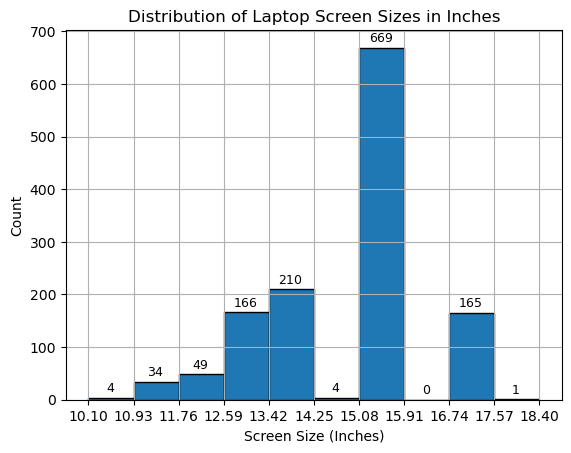

In [1079]:
counts, bin_edges, _ = plt.hist(df["Inches"], bins=10, edgecolor='black')
plt.xticks(bin_edges)
for count, x in zip(counts, bin_edges):
    plt.text(x+0.4, count + 5, str(int(count)), ha='center', va='bottom', fontsize=9)
plt.xlabel("Screen Size (Inches)")
plt.ylabel("Count")
plt.title("Distribution of Laptop Screen Sizes in Inches")
plt.grid(True)
plt.show()

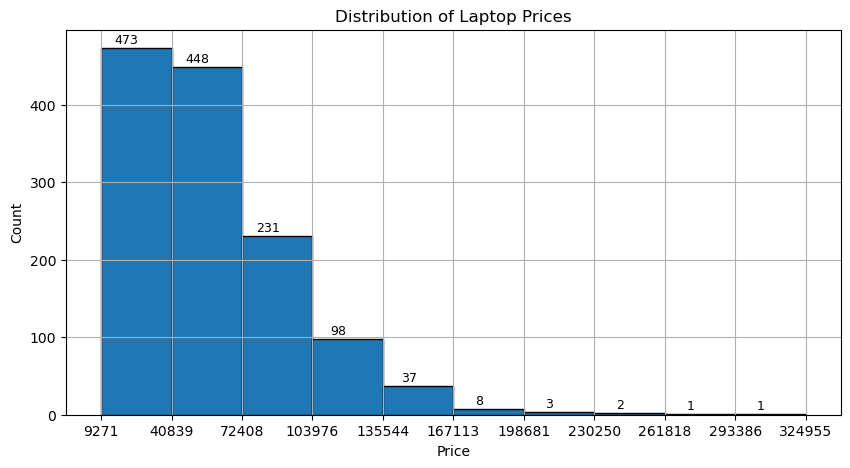

In [1080]:
plt.figure(figsize= (10,5))
counts, bin_edges, _ = plt.hist(df["Price"], bins=10, edgecolor='black')
plt.xticks(bin_edges)
for count, x in zip(counts, bin_edges):
    plt.text(x+11500, count + 2, str(int(count)), ha='center', va='bottom', fontsize=9)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Laptop Prices")
plt.grid(True)
plt.show()

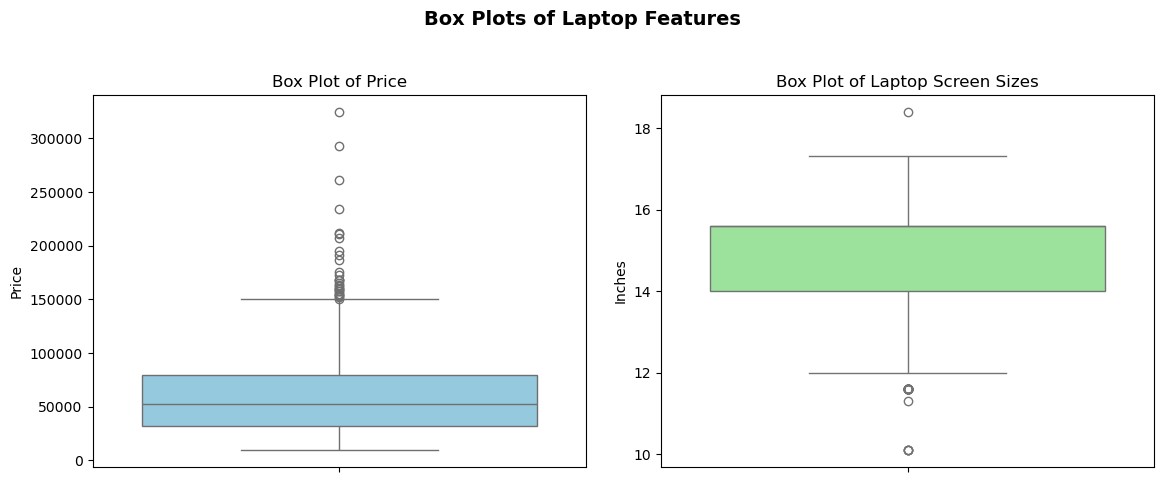

In [1081]:
plt.figure(figsize=(12, 5))
plt.suptitle("Box Plots of Laptop Features", fontsize=14, fontweight='bold')

plt.subplot(1, 2, 1)
sns.boxplot(y=df["Price"], color='skyblue')
plt.title("Box Plot of Price")

plt.subplot(1, 2, 2)
sns.boxplot(y=df["Inches"], color='lightgreen')
plt.title("Box Plot of Laptop Screen Sizes")

plt.tight_layout(pad=2)
plt.show()

In [1082]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{column}:\n  Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
    print(f"  Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")
    print(f"  Original Count: {len(df)}, New Count: {len(df[(df[column] >= lower_bound) & (df[column] <= upper_bound)])}\n")

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [1083]:
df = remove_outliers_iqr(df, 'Inches')
df = remove_outliers_iqr(df, 'Price')

Inches:
  Q1 = 14.0, Q3 = 15.6, IQR = 1.5999999999999996
  Lower Bound = 11.600000000000001, Upper Bound = 18.0
  Original Count: 1302, New Count: 1263

Price:
  Q1 = 33513.119999999995, Q3 = 79866.72, IQR = 46353.600000000006
  Lower Bound = -36017.28000000001, Upper Bound = 149397.12
  Original Count: 1263, New Count: 1233



In [1084]:
df.shape

(1233, 45)

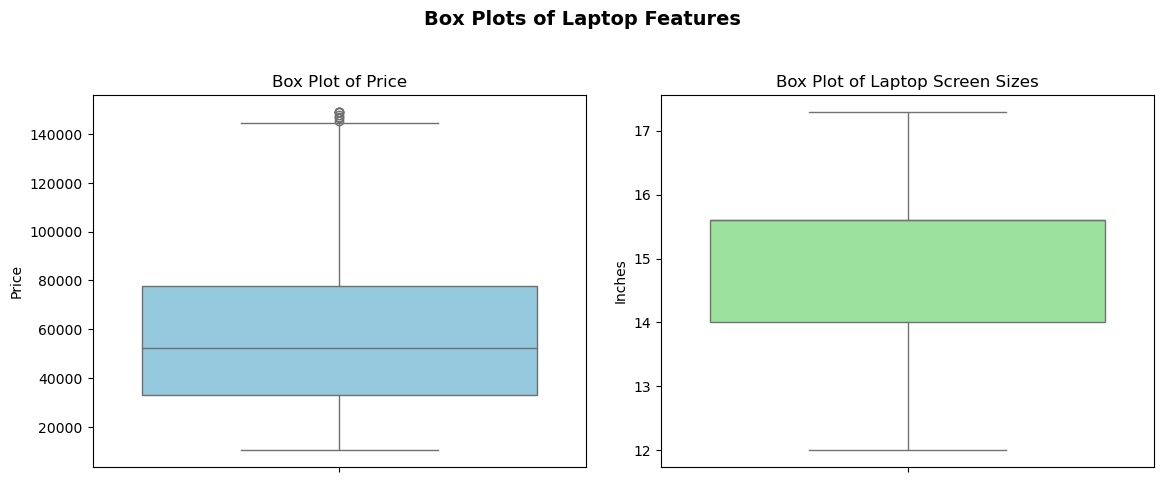

In [1085]:
plt.figure(figsize=(12, 5))
plt.suptitle("Box Plots of Laptop Features", fontsize=14, fontweight='bold')

plt.subplot(1, 2, 1)
sns.boxplot(y=df["Price"], color='skyblue')
plt.title("Box Plot of Price")

plt.subplot(1, 2, 2)
sns.boxplot(y=df["Inches"], color='lightgreen')
plt.title("Box Plot of Laptop Screen Sizes")

plt.tight_layout(pad=2)
plt.show()

Text(0.5, 1.0, 'Box Plot of Weight')

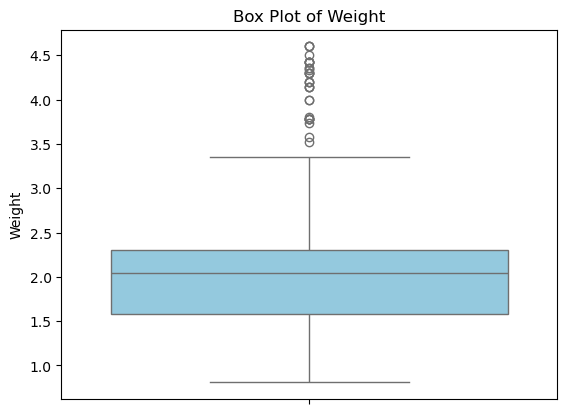

In [1086]:
sns.boxplot(y=df["Weight"], color='skyblue')
plt.title("Box Plot of Weight")

In [1087]:
df.shape

(1233, 45)

In [1088]:
np.round(1039 / 1303 * 100)

np.float64(80.0)

In [1089]:
df.head()

,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,Company_Lenovo,Company_MSI,Company_Other,Company_Toshiba,TypeName_2 in 1 Convertible,...,OS_Windows,Cpu_Speed_GHz,AMD Processor,Intel Core i3,Intel Core i5,Intel Core i7,Other Processor,GPU__AMD,GPU__Intel,GPU__Nvidia
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.7,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [1090]:
df["OS_Other"].value_counts()

OS_Other
0.0    1233
Name: count, dtype: int64

In [1091]:
df.drop(columns = ["OS_Other"],inplace = True)

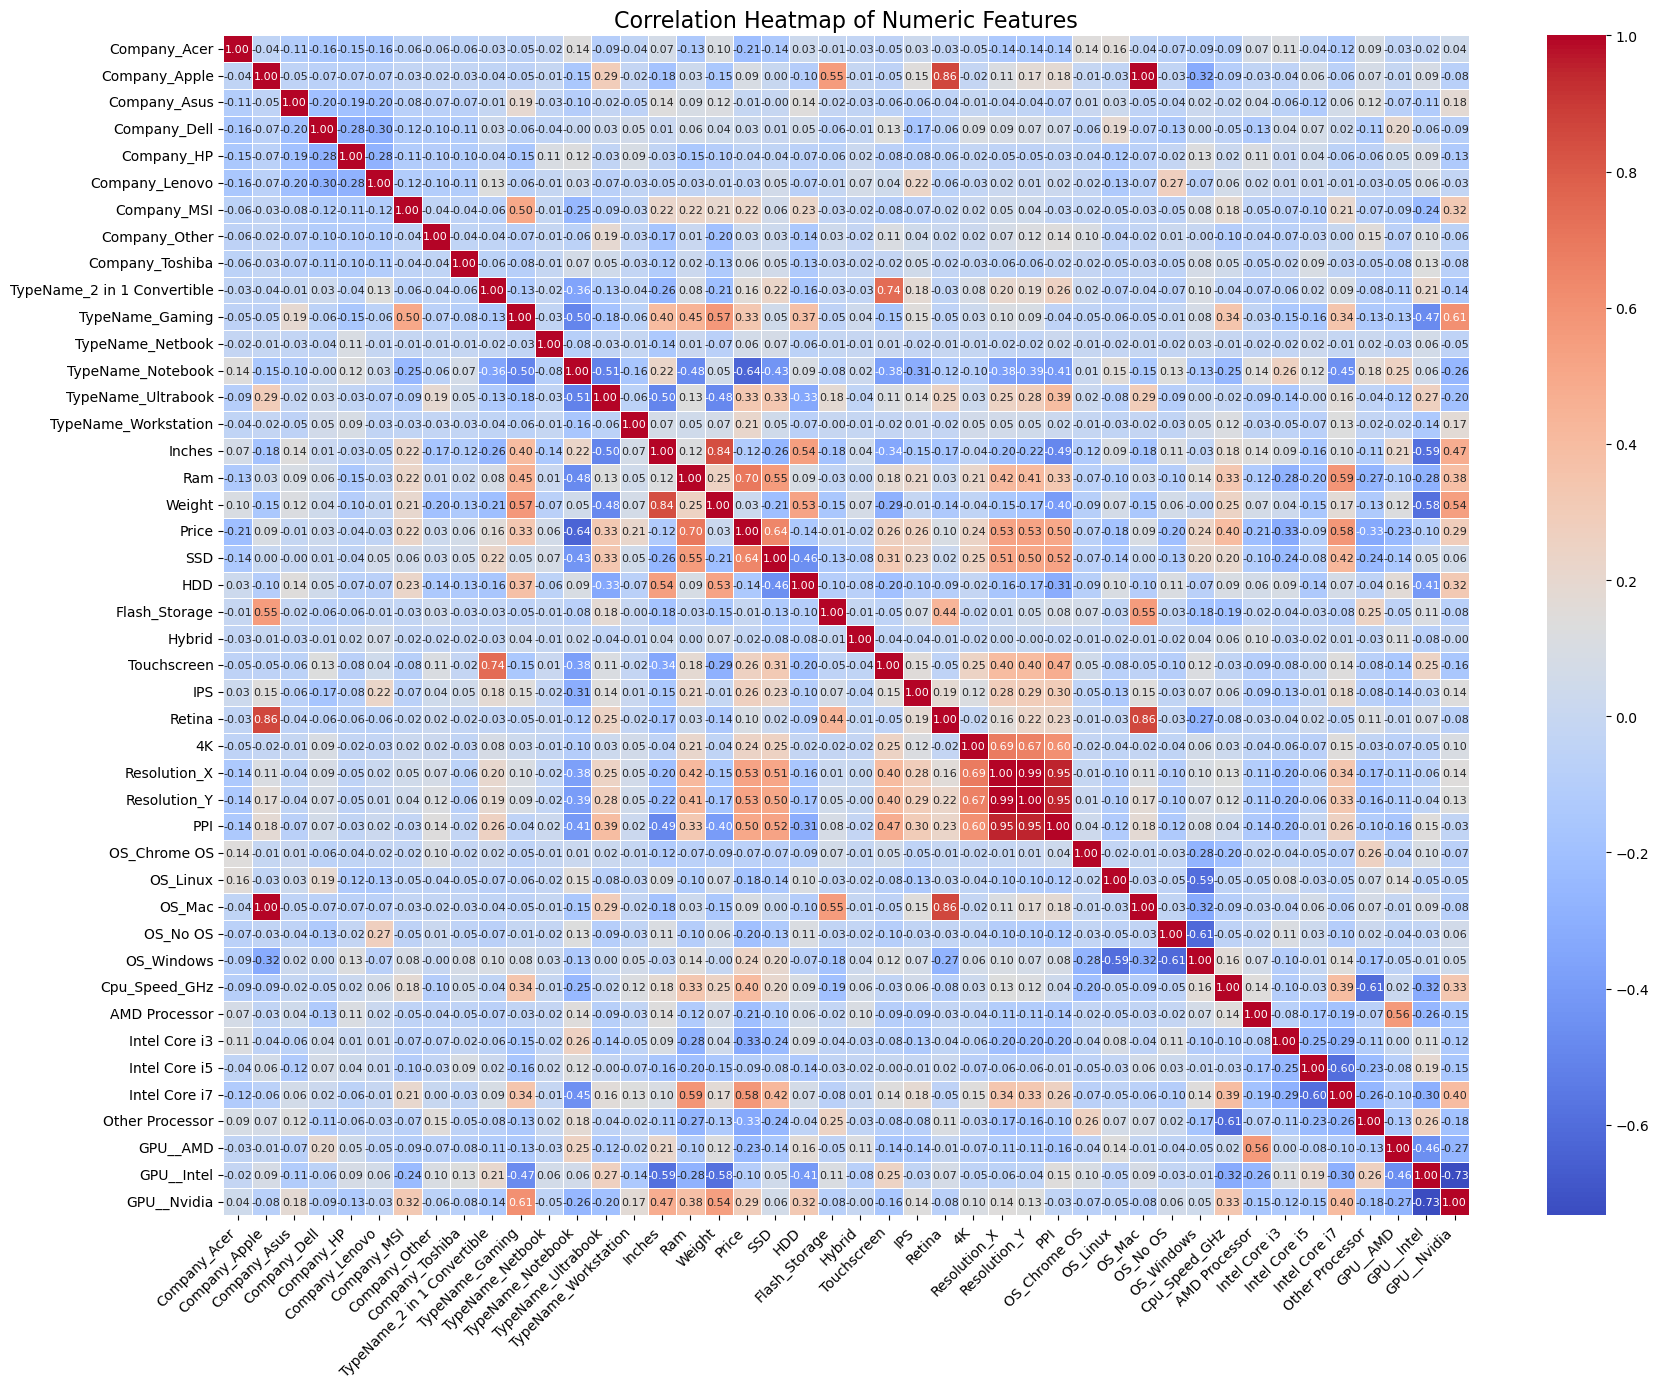

In [1092]:
plt.figure(figsize=(18, 14))  
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",   
    linewidths=0.5,       
    annot_kws={"size": 8} 
)

plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate for visibility
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [1093]:
df.corr()["Price"]

Company_Acer                  -0.211360
Company_Apple                  0.093447
Company_Asus                  -0.008561
Company_Dell                   0.029753
Company_HP                    -0.035752
Company_Lenovo                -0.029825
Company_MSI                    0.223258
Company_Other                  0.026135
Company_Toshiba                0.061563
TypeName_2 in 1 Convertible    0.155853
TypeName_Gaming                0.331735
TypeName_Netbook               0.062712
TypeName_Notebook             -0.636957
TypeName_Ultrabook             0.327989
TypeName_Workstation           0.209813
Inches                        -0.122796
Ram                            0.702100
Weight                         0.025357
Price                          1.000000
SSD                            0.642928
HDD                           -0.138773
Flash_Storage                 -0.005498
Hybrid                        -0.016080
Touchscreen                    0.261726
IPS                            0.262572


In [1094]:
df.drop(columns = ["Resolution_X","Resolution_Y"],inplace = True)

In [1095]:
df.sample(5)

,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,Company_Lenovo,Company_MSI,Company_Other,Company_Toshiba,TypeName_2 in 1 Convertible,...,OS_Windows,Cpu_Speed_GHz,AMD Processor,Intel Core i3,Intel Core i5,Intel Core i7,Other Processor,GPU__AMD,GPU__Intel,GPU__Nvidia
589,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
122,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1198,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1055,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
763,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [1364]:
df.columns

Index(['Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Dell',
       'Company_HP', 'Company_Lenovo', 'Company_MSI', 'Company_Other',
       'Company_Toshiba', 'TypeName_2 in 1 Convertible', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'Inches', 'Ram', 'Weight', 'Price', 'SSD',
       'HDD', 'Flash_Storage', 'Hybrid', 'Touchscreen', 'IPS', 'Retina', '4K',
       'PPI', 'OS_Chrome OS', 'OS_Linux', 'OS_Mac', 'OS_No OS', 'OS_Windows',
       'Cpu_Speed_GHz', 'AMD Processor', 'Intel Core i3', 'Intel Core i5',
       'Intel Core i7', 'Other Processor', 'GPU__AMD', 'GPU__Intel',
       'GPU__Nvidia'],
      dtype='object')

In [1332]:
x = df.drop("Price",axis = 1)
y = df["Price"]

In [1333]:
y = np.log(y)

In [1334]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [1335]:
x_train.shape

(986, 41)

In [1336]:
x_test.shape

(247, 41)

In [1337]:
lr = LinearRegression()
lr.fit(x_train,y_train)
yhat = lr.predict(x_test)

print("r2 score : ",r2_score(y_test, yhat))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat))

r2 score :  0.8518033486307788
mean_absolue_error :  0.17689162980918333


In [1338]:
rr = Ridge(alpha = 0.0001)
rr.fit(x_train,y_train)
yhat = rr.predict(x_test)

print("r2 score : ",r2_score(y_test, yhat))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat))

r2 score :  0.8518034585535056
mean_absolue_error :  0.1768915557094643


In [1339]:
lar = Lasso(alpha = 0.0001)
lar.fit(x_train,y_train)
yhat = lar.predict(x_test)

print("r2 score : ",r2_score(y_test, yhat))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat))

r2 score :  0.8525342086611603
mean_absolue_error :  0.17636228078380928


In [1340]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
yhat = knn.predict(x_test)

print("r2 score : ",r2_score(y_test, yhat))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat))

r2 score :  0.8403798555200883
mean_absolue_error :  0.1832196816288503


In [1341]:
dt = DecisionTreeRegressor(max_depth=10,random_state = 42)
dt.fit(x_train,y_train)
yhat = dt.predict(x_test)

print("r2 score : ",r2_score(y_test, yhat))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat))

r2 score :  0.8766590977350399
mean_absolue_error :  0.15145600609133572


In [1342]:
rf = RandomForestRegressor(n_estimators=100,random_state = 42)
rf.fit(x_train,y_train)
yhat = rf.predict(x_test)

print("r2 score : ",r2_score(y_test, yhat))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat))

r2 score :  0.9010560109724434
mean_absolue_error :  0.1377889266192445


In [1343]:
et = ExtraTreesRegressor(n_estimators=100,
                              random_state=3)
et.fit(x_train,y_train)
yhat = et.predict(x_test)

print("r2 score : ",r2_score(y_test, yhat))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat))

r2 score :  0.9022860668660638
mean_absolue_error :  0.13925404967210184


In [1344]:
ab = AdaBoostRegressor(n_estimators=200,
                              random_state=3,
                              )
ab.fit(x_train,y_train)
yhat = ab.predict(x_test)

print("r2 score : ",r2_score(y_test, yhat))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat))

r2 score :  0.8253126103091535
mean_absolue_error :  0.19714905699359908


In [1281]:
dt_params = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [0.5, 0.75, 1.0],
}

dt = DecisionTreeRegressor(random_state=42)
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='r2', n_jobs=-1)
dt_grid.fit(x_train, y_train)

print("Best Decision Tree Params:", dt_grid.best_params_)
print("Decision Tree R2 Score:", r2_score(y_test, dt_grid.predict(x_test)))


Best Decision Tree Params: {'max_depth': None, 'max_features': 0.75, 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree R2 Score: 0.8392586713482524


In [1282]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'max_features': [0.5, 0.75, 1.0],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(x_train, y_train)

print("Best Random Forest Params:", rf_grid.best_params_)
print("Random Forest R2 Score:", r2_score(y_test, rf_grid.predict(x_test)))


Best Random Forest Params: {'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest R2 Score: 0.9123658902724587


In [1283]:
et_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'max_features': [0.5, 0.75, 1.0],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

et = ExtraTreesRegressor(random_state=3)
et_grid = GridSearchCV(et, et_params, cv=5, scoring='r2', n_jobs=-1)
et_grid.fit(x_train, y_train)

print("Best Extra Trees Params:", et_grid.best_params_)
print("Extra Trees R2 Score:", r2_score(y_test, et_grid.predict(x_test)))


Best Extra Trees Params: {'max_depth': 15, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Extra Trees R2 Score: 0.9035576172414888


# **Random Forest , Decision Tree and , Extra Tree Classiifier will be used for the Stacking and Votting Classifier**

In [1345]:
rf = RandomForestRegressor(max_depth =  None, max_features =  0.5, min_samples_leaf =  1, min_samples_split = 2, n_estimators =  200,random_state = 3)
rf.fit(x_train,y_train)
yhat = rf.predict(x_test)

print("r2 score : ",r2_score(y_test, yhat))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat))

r2 score :  0.9115716652785242
mean_absolue_error :  0.13076266477493878


In [1346]:
et = ExtraTreesRegressor(n_estimators=200,
                              random_state=3,
                              max_features=0.5,
                              max_depth=15)
et.fit(x_train,y_train)
yhat = et.predict(x_test)

print("r2 score : ",r2_score(y_test, yhat))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat))

r2 score :  0.9081526425867337
mean_absolue_error :  0.1332780656110843


In [1347]:
dt = DecisionTreeRegressor(max_depth=10,random_state = 3)
dt.fit(x_train,y_train)
yhat = dt.predict(x_test)

print("r2 score : ",r2_score(y_test, yhat))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat))

r2 score :  0.8697898639884285
mean_absolue_error :  0.1550291580370914


In [1356]:
voting_model = VotingRegressor(estimators=[
    ('rf', rf),
    ('et', et),
    ('dt', dt)
])

voting_model.fit(x_train, y_train)
voting_preds = voting_model.predict(x_test)

print("📊 Voting Regressor")
print("R² Score:", r2_score(y_test, voting_preds) * 100)
print("MAE:", mean_absolute_error(y_test, voting_preds))


📊 Voting Regressor
R² Score: 91.44493950909636
MAE: 0.12741551370745435


In [1355]:
stacking_model = StackingRegressor(
    estimators=[
        ('rf', rf),
        ('et', et),
        ('dt', dt)
    ],
    final_estimator=LinearRegression(),cv = 3
)

stacking_model.fit(x_train, y_train)
stacking_preds = stacking_model.predict(x_test)

print("📊 Stacking Regressor")
print("R² Score:", r2_score(y_test, stacking_preds))
print("MAE:", mean_absolute_error(y_test, stacking_preds))


📊 Stacking Regressor
R² Score: 0.9140228384308778
MAE: 0.1296473114278041


# **Now The Final model is Vottig Regressor With 91.44% accuracy**

In [1357]:
voting_model = VotingRegressor(estimators=[
    ('rf', rf),
    ('et', et),
    ('dt', dt)
])

voting_model.fit(x_train, y_train)
voting_preds = voting_model.predict(x_test)

print("📊 Voting Regressor")
print("R² Score:", r2_score(y_test, voting_preds) * 100)
print("MAE:", mean_absolute_error(y_test, voting_preds))


📊 Voting Regressor
R² Score: 91.44493950909636
MAE: 0.12741551370745435


In [1358]:
voting_model

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_features=0.5,
                                                   n_estimators=200,
                                                   random_state=3)),
                            ('et',
                             ExtraTreesRegressor(max_depth=15, max_features=0.5,
                                                 n_estimators=200,
                                                 random_state=3)),
                            ('dt',
                             DecisionTreeRegressor(max_depth=10,
                                                   random_state=3))])

In [1360]:
import joblib
joblib.dump(voting_model, 'laptop_price_predictor.pkl')
joblib.dump(x_train.columns.tolist(), 'model_features.pkl')

['model_features.pkl']

In [1372]:
resolution = "2560x1600"
X_res = int(resolution.split('x')[0])
Y_res = int(resolution.split('x')[1])
ppi = ((X_res**2) + (Y_res**2))**0.5/13.30
ppi

226.98300468106115